In [73]:
import numpy as np

# 1.1 Define Model Parameters

# Number of RIS elements
NUMBER_OF_ELEMENTS = 300

# Reflection coefficients for RIS elements (random values between 0 and 1)
reflection_coefficients = np.random.rand(NUMBER_OF_ELEMENTS)

# Horizontal channel gains for RIS elements (random values representing the channel conditions)
Channel_coefficient = np.random.rand(NUMBER_OF_ELEMENTS)

# Transmit efficiency factors for RIS elements (random values between 0.85 and 1)
transmit_efficiency_factors = np.random.uniform(0.85, 1.0, NUMBER_OF_ELEMENTS)

# Constants for SNR calculation
h_V = 1.0 # Vertical channel gain
sigma_k = 0.1 # Noise level

# Constants for received power (Pr) and noise level (sigma_k)
Pr = 1.0  # Received power at the RIS elements
# Assuming sigma_k represents noise power
sigma_k_ = sigma_k * 100

# Function to calculate energy harvested (Eh) for an RIS element
def calculate_energy_harvested(omega, h_H):
    return (Pr * (1 - abs(omega)**2) * abs(h_H)**2) / 2

# Function to calculate energy transmitted (Et) for an RIS element
def calculate_energy_transmitted(omega, h_H, eta_t):
    return (Pr * abs(omega)**2 * abs(h_H)**2) / (2 * eta_t)

def calculate_transmitted_snr(omega, h_H):
    snr_term = Pr * h_V * omega * h_H
    snr = abs(snr_term)**2 / sigma_k_
    return snr

# Calculating energy harvested (Eh) and energy transmitted (Et) for each RIS element
energy_harvested = [calculate_energy_harvested(omega, h_H) for omega, h_H in zip(reflection_coefficients, Channel_coefficient)]
energy_transmitted = [calculate_energy_transmitted(omega, h_H, eta_t) for omega, h_H, eta_t in zip(reflection_coefficients, Channel_coefficient, transmit_efficiency_factors)]
transmitted_snr_values = [calculate_transmitted_snr(omega, h_H) for omega, h_H in zip(reflection_coefficients, Channel_coefficient)]


# Preview of model parameters
reflection_coefficients[:5], Channel_coefficient[:5], transmit_efficiency_factors[:5], energy_harvested[:5], energy_transmitted[:5], transmitted_snr_values[:5]


(array([0.05066981, 0.33665079, 0.77098703, 0.44430957, 0.15205701]),
 array([0.76147795, 0.43364168, 0.63424313, 0.35626839, 0.27038629]),
 array([0.89179209, 0.9799235 , 0.93482506, 0.91751549, 0.97815542]),
 [0.2891799704937257,
  0.08336662567117642,
  0.08157498660852962,
  0.0509351729826397,
  0.035709186875766685],
 [0.0008346792285937733,
  0.010874246289041108,
  0.12789257837738136,
  0.013654711019023167,
  0.0008640609340634465])

In [74]:
from collections import namedtuple
from random import sample, random

# Parameters for Genetic Algorithm
POPULATION_SIZE = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1
GENERATIONS = 100

# Namedtuple to store individual solutions
Individual = namedtuple("Individual", ["grouping", "fitness"])

# Function to evaluate the fitness of an individual solution
def evaluate_fitness(grouping):
    eh_group = [i for i in range(NUMBER_OF_ELEMENTS) if grouping[i] == 0]
    et_group = [i for i in range(NUMBER_OF_ELEMENTS) if grouping[i] == 1]

    total_eh = sum(energy_harvested[i] for i in eh_group)
    total_et = sum(energy_transmitted[i] for i in et_group)
    total_snr = sum(transmitted_snr_values[i] for i in et_group)

    # Primary objective: Ensure Eh > Et
    if total_eh <= total_et:
        return 0
    
    # Secondary objective: Maximize transmitted SNR
    return total_snr

# Function to create an initial population
def create_initial_population():
    population = []
    for _ in range(POPULATION_SIZE):
        # Randomly assign RIS elements to energy harvesting (0) or signal transmission (1) groups
        grouping = sample([0] * (NUMBER_OF_ELEMENTS // 2) + [1] * (NUMBER_OF_ELEMENTS // 2), NUMBER_OF_ELEMENTS)
        fitness = evaluate_fitness(grouping)
        individual = Individual(grouping, fitness)
        population.append(individual)
    return population

# Creating the initial population
initial_population = create_initial_population()

# Preview of the first 3 individuals in the initial population
initial_population[:3]


[Individual(grouping=[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], fitness=16.517217055274436),
 Individual(grouping=[1, 0, 0, 0, 0, 1, 0, 1, 1,

In [75]:
# Function for tournament selection
def tournament_selection(population, tournament_size=5):
    tournament = sample(population, tournament_size)
    winner = max(tournament, key=lambda x: x.fitness)
    return winner

# Function for crossover between two parents
def crossover(parent1, parent2):
    if random() < CROSSOVER_RATE:
        crossover_point = np.random.randint(1, NUMBER_OF_ELEMENTS - 1)
        child1_grouping = parent1.grouping[:crossover_point] + parent2.grouping[crossover_point:]
        child2_grouping = parent2.grouping[:crossover_point] + parent1.grouping[crossover_point:]
        return Individual(child1_grouping, evaluate_fitness(child1_grouping)), Individual(child2_grouping, evaluate_fitness(child2_grouping))
    return parent1, parent2

# Function for mutation of an individual
def mutate(individual):
    if random() < MUTATION_RATE:
        mutation_point = np.random.randint(NUMBER_OF_ELEMENTS)
        mutated_grouping = individual.grouping[:]
        mutated_grouping[mutation_point] = 1 - mutated_grouping[mutation_point]
        return Individual(mutated_grouping, evaluate_fitness(mutated_grouping))
    return individual

# Function to run the genetic algorithm
def run_genetic_algorithm():
    population = initial_population
    best_individual = max(population, key=lambda x: x.fitness)
    for generation in range(GENERATIONS):
        # Selection
        selected_parents = [tournament_selection(population) for _ in range(POPULATION_SIZE)]
        # Crossover
        offspring = []
        for p1, p2 in zip(selected_parents[::2], selected_parents[1::2]):
            child1, child2 = crossover(p1, p2)
            offspring.extend([child1, child2])
        # Mutation
        offspring = [mutate(child) for child in offspring]
        # Creating the new generation
        population = selected_parents + offspring
        # Updating the best individual
        current_best_individual = max(population, key=lambda x: x.fitness)
        if current_best_individual.fitness > best_individual.fitness:
            best_individual = current_best_individual
    return best_individual

# Running the genetic algorithm to find the optimal solution
optimal_solution = run_genetic_algorithm()
optimal_solution.grouping, optimal_solution.fitness


([0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,


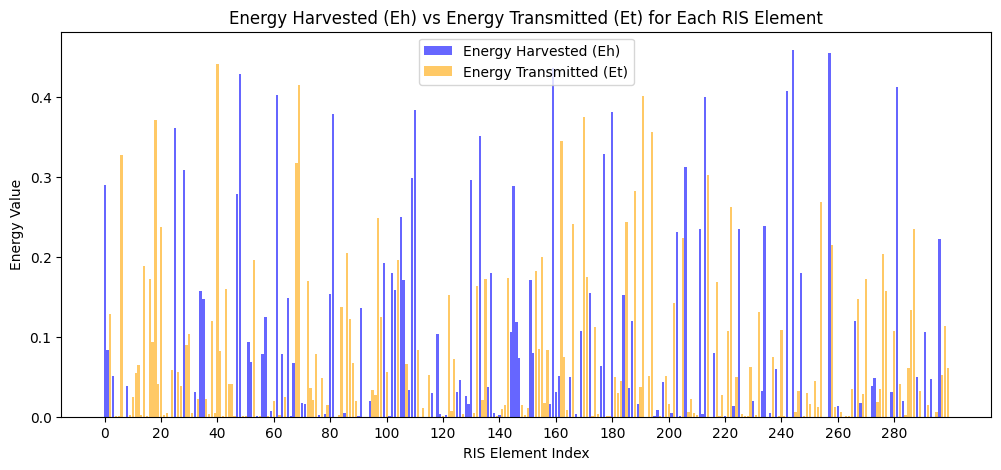

In [76]:
import matplotlib.pyplot as plt

# Function to visualize Energy Harvested (Eh) vs Energy Transmitted (Et) for each RIS element
def visualize_energy_values(grouping):
    eh_values = [energy_harvested[i] if grouping[i] == 0 else 0 for i in range(NUMBER_OF_ELEMENTS)]
    et_values = [energy_transmitted[i] if grouping[i] == 1 else 0 for i in range(NUMBER_OF_ELEMENTS)]

    plt.figure(figsize=[12, 5])
    plt.bar(range(NUMBER_OF_ELEMENTS), eh_values, color='blue', alpha=0.6, label='Energy Harvested (Eh)')
    plt.bar(range(NUMBER_OF_ELEMENTS), et_values, color='orange', alpha=0.6, label='Energy Transmitted (Et)')
    plt.xlabel('RIS Element Index')
    plt.ylabel('Energy Value')
    plt.title('Energy Harvested (Eh) vs Energy Transmitted (Et) for Each RIS Element')
    plt.xticks(range(0, NUMBER_OF_ELEMENTS, 20))
    plt.legend()
    plt.show()

# Visualizing the Energy Harvested (Eh) and Energy Transmitted (Et) for each RIS element
visualize_energy_values(optimal_solution.grouping)


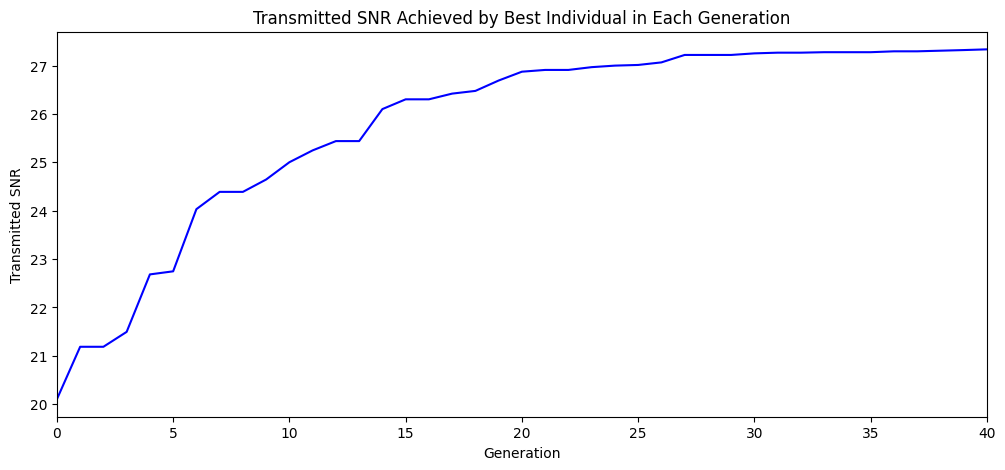

In [77]:
# Function to run the modified genetic algorithm and track transmitted SNR by generation
def run_modified_genetic_algorithm():
    population = initial_population
    best_individual = max(population, key=lambda x: x.fitness)
    snr_by_generation = [best_individual.fitness]

    for generation in range(GENERATIONS):
        # Selection
        selected_parents = [tournament_selection(population) for _ in range(POPULATION_SIZE)]
        # Crossover
        offspring = []
        for p1, p2 in zip(selected_parents[::2], selected_parents[1::2]):
            child1, child2 = crossover(p1, p2)
            offspring.extend([child1, child2])
        # Mutation
        offspring = [mutate(child) for child in offspring]
        # Creating the new generation
        population = selected_parents + offspring
        # Updating the best individual
        current_best_individual = max(population, key=lambda x: x.fitness)
        if current_best_individual.fitness > best_individual.fitness:
            best_individual = current_best_individual
        snr_by_generation.append(best_individual.fitness)

    return best_individual, snr_by_generation

# Running the modified genetic algorithm and tracking transmitted SNR by generation
optimal_solution_modified, snr_by_generation = run_modified_genetic_algorithm()

# Function to visualize transmitted SNR by generation
def visualize_snr_by_generation(snr_by_generation):
    plt.figure(figsize=[12, 5])
    plt.plot(snr_by_generation, color='blue')
    plt.xlabel('Generation')
    #limit x to 0 to 30
    plt.xlim(0, 40)
    plt.ylabel('Transmitted SNR')
    plt.title('Transmitted SNR Achieved by Best Individual in Each Generation')
    plt.show()

# Visualizing the transmitted SNR by generation
visualize_snr_by_generation(snr_by_generation)
